In [3]:
pip install netCDF4

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [4]:
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt

In [5]:
data_precip = nc.Dataset("/Users/joey/Documents/GitHub/DRP_Spr2025/Data/data_accum.nc", 'r')
data_temp = nc.Dataset("/Users/joey/Documents/GitHub/DRP_Spr2025/Data/data_instant.nc", 'r')


In [6]:
data_precip

<class 'netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    GRIB_centre: ecmf
    GRIB_centreDescription: European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre: 0
    Conventions: CF-1.7
    institution: European Centre for Medium-Range Weather Forecasts
    history: 2025-04-06T21:07 GRIB to CDM+CF via cfgrib-0.9.15.0/ecCodes-2.39.0 with {"source": "tmpxg3zsvxt/data.grib", "filter_by_keys": {"stream": ["oper"], "stepType": ["accum"]}, "encode_cf": ["parameter", "time", "geography", "vertical"]}
    dimensions(sizes): valid_time(672), latitude(13), longitude(9)
    variables(dimensions): int64 number(), int64 valid_time(valid_time), float64 latitude(latitude), float64 longitude(longitude), <class 'str'> expver(valid_time), float32 tp(valid_time, latitude, longitude)
    groups: 

In [19]:
data_precip.dimensions

{'valid_time': "<class 'netCDF4.Dimension'>": name = 'valid_time', size = 672,
 'latitude': "<class 'netCDF4.Dimension'>": name = 'latitude', size = 13,
 'longitude': "<class 'netCDF4.Dimension'>": name = 'longitude', size = 9}

In [20]:
data_precip.variables

{'number': <class 'netCDF4.Variable'>
 int64 number()
     long_name: ensemble member numerical id
     units: 1
     standard_name: realization
 unlimited dimensions: 
 current shape = ()
 filling on, default _FillValue of -9223372036854775806 used,
 'valid_time': <class 'netCDF4.Variable'>
 int64 valid_time(valid_time)
     long_name: time
     standard_name: time
     units: seconds since 1970-01-01
     calendar: proleptic_gregorian
 unlimited dimensions: 
 current shape = (672,)
 filling on, default _FillValue of -9223372036854775806 used,
 'latitude': <class 'netCDF4.Variable'>
 float64 latitude(latitude)
     _FillValue: nan
     units: degrees_north
     standard_name: latitude
     long_name: latitude
     stored_direction: decreasing
 unlimited dimensions: 
 current shape = (13,)
 filling on,
 'longitude': <class 'netCDF4.Variable'>
 float64 longitude(longitude)
     _FillValue: nan
     units: degrees_east
     standard_name: longitude
     long_name: longitude
 unlimited di

In [ ]:
latitude_var = data_precip.variables['latitude'][:]
print(latitude_var)
longitude_var = data_precip.variables['longitude'][:]
print(longitude_var)
precip_var = data_precip.variables['tp'][:]
print(precip_var)

[49.   48.75 48.5  48.25 48.   47.75 47.5  47.25 47.   46.75 46.5  46.25
 46.  ]
[-122.   -121.75 -121.5  -121.25 -121.   -120.75 -120.5  -120.25 -120.  ]
[[[2.77423859e-03 2.57778168e-03 2.15816498e-03 ... 3.34739685e-04
   2.37464905e-04 2.14576721e-04]
  [2.93064117e-03 2.73513794e-03 2.30789185e-03 ... 3.55720520e-04
   2.54631042e-04 2.50816345e-04]
  [2.62260437e-03 2.37846375e-03 2.02178955e-03 ... 6.58035278e-04
   4.43458557e-04 2.98500061e-04]
  ...
  [2.67601013e-03 2.61306763e-03 2.48146057e-03 ... 3.95774841e-04
   2.37464905e-04 1.48773193e-04]
  [3.08990479e-03 2.75611877e-03 2.60162354e-03 ... 3.15666199e-04
   1.71661377e-04 1.51634216e-04]
  [3.68309021e-03 3.15570831e-03 2.10380554e-03 ... 2.66075134e-04
   1.18255615e-04 3.33786011e-05]]

 [[2.70462036e-03 2.70080566e-03 2.43091583e-03 ... 7.03811646e-04
   4.72068787e-04 3.12328339e-04]
  [3.02314758e-03 2.91728973e-03 2.63500214e-03 ... 7.24315643e-04
   5.15460968e-04 4.13894653e-04]
  [2.96449661e-03 2.88057327e

In [17]:
data_var = data_precip.variables['tp'][:]
data = data_var[0, :, :]

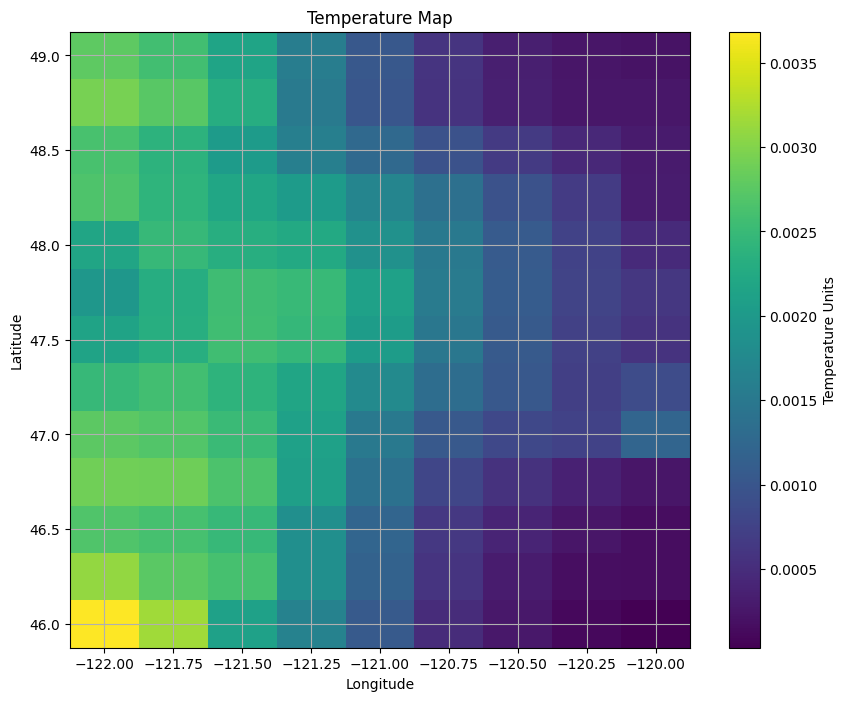

In [18]:
plt.figure(figsize=(10, 8))
plt.pcolormesh(longitude_var, latitude_var, data)
plt.colorbar(label='Temperature Units')  # Add a colorbar with appropriate label
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Temperature Map')
plt.grid(True)
plt.show()